Hi everyone! This is the notebook we will use tf.Keras to train/evaluate/predict a classifer for cat/dog/bird with convolutional layers. With tf.Keras things become very simple all we have to do is to combine codes from previous notebooks!

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import utils
import os

print(tf.__version__)

2.0.0-alpha0
2.0.0-alpha0


In [2]:
class_names = ['bird','cat','dog']

Preparing Data

In [3]:
filenames = []
labels = []
for filename in os.listdir("./data"):
    filenames.append(os.path.join("./data",filename))
    if filename.startswith("bird"):
        labels.append(0)
    elif filename.startswith("cat"):
        labels.append(1)
    else:
        labels.append(2)
print(filenames)
print(labels)

['../data/bird (20)', '../data/dog (33)', '../data/dog (28)', '../data/bird (19)', '../data/cat (18)', '../data/dog (13)', '../data/cat (8)', '../data/bird (38)', '../data/bird (7)', '../data/bird (25)', '../data/dog (17)', '../data/cat (29)', '../data/cat (40)', '../data/bird (29)', '../data/dog (16)', '../data/cat (27)', '../data/bird (16)', '../data/dog (2)', '../data/bird (5)', '../data/dog (18)', '../data/cat (22)', '../data/dog (12)', '../data/bird (36)', '../data/bird (14)', '../data/dog (29)', '../data/dog (24)', '../data/bird (12)', '../data/dog (27)', '../data/cat (15)', '../data/dog (7)', '../data/cat (25)', '../data/bird (31)', '../data/bird (8)', '../data/cat (16)', '../data/dog (40)', '../data/dog (8)', '../data/cat (37)', '../data/bird (17)', '../data/bird (10)', '../data/cat (20)', '../data/cat (28)', '../data/cat (5)', '../data/cat (6)', '../data/dog (22)', '../data/bird (35)', '../data/dog (30)', '../data/cat (35)', '../data/dog (37)', '../data/cat (17)', '../data/dog

In [4]:
path_dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))

def load_and_preprocess_image(filename, label):
    raw_image = tf.io.read_file(filename)
    image_tensor = tf.image.decode_jpeg(raw_image)
    image_tensor = tf.image.resize(image_tensor, [224, 224])
    image_tensor /= 255.0
    return image_tensor,label
imageDataset = path_dataset.map(load_and_preprocess_image)

In [5]:
trainDataset = imageDataset.take(int(len(filenames)* 0.7))
testDataset = imageDataset.skip(int(len(filenames)* 0.7))

Preparing Model

In [6]:
cnnModel = keras.Sequential()
cnnModel.add(layers.Conv2D(input_shape=[224,224,3],filters = 32, kernel_size = 4, strides = 1,
                       activation = 'relu'))
cnnModel.add(layers.Conv2D(filters = 32, kernel_size = 4, strides = 1,
                       activation = 'relu'))
cnnModel.add(layers.MaxPool2D(pool_size = 4, strides = 4))
cnnModel.add(layers.Dropout(0.3))
cnnModel.add(layers.Conv2D(filters = 64, kernel_size = 4, strides = 1,
                       activation = 'relu'))
cnnModel.add(layers.Conv2D(filters = 64, kernel_size = 4, strides = 1,
                       activation = 'relu'))
cnnModel.add(layers.MaxPool2D(pool_size = 4, strides = 4))
cnnModel.add(layers.Dropout(0.3))
cnnModel.add(layers.Conv2D(filters = 128, kernel_size = 4, strides = 1,
                       activation = 'relu'))
cnnModel.add(layers.Conv2D(filters = 128, kernel_size = 4, strides = 1,
                       activation = 'relu'))
cnnModel.add(layers.MaxPool2D(pool_size = 2, strides = 2))
cnnModel.add(layers.Dropout(0.3))
cnnModel.add(layers.Flatten())
cnnModel.add(layers.Dense(units = 512, activation = 'relu'))
cnnModel.add(layers.Dense(units = 10, activation = 'softmax'))
cnnModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 221, 221, 32)      1568      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 218, 218, 32)      16416     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 54, 54, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 51, 51, 64)        32832     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        65600     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0

Compiling Model

In [7]:
cnnModel.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),
             loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

Training Procedure

In [8]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
    tf.keras.callbacks.ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
]
history = cnnModel.fit(trainDataset.shuffle(5).repeat().batch(5), epochs=20, steps_per_epoch=50, validation_data=testDataset.repeat().batch(10), validation_steps=10, callbacks = callbacks)

Epoch 1/20
50/50 [==============================] - 25s 506ms/step - loss: 1.2875 - accuracy: 0.3240 - val_loss: 1.2180 - val_accuracy: 0.3400
Epoch 2/20
50/50 [==============================] - 23s 461ms/step - loss: 1.1974 - accuracy: 0.2680 - val_loss: 1.2522 - val_accuracy: 0.3000
Epoch 3/20
50/50 [==============================] - 23s 462ms/step - loss: 1.1515 - accuracy: 0.3240 - val_loss: 1.1719 - val_accuracy: 0.3800
Epoch 4/20
50/50 [==============================] - 23s 461ms/step - loss: 1.1452 - accuracy: 0.3360 - val_loss: 1.2455 - val_accuracy: 0.2700
Epoch 5/20
50/50 [==============================] - 23s 459ms/step - loss: 1.1124 - accuracy: 0.3560 - val_loss: 1.2101 - val_accuracy: 0.2500


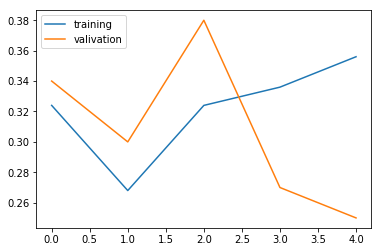

In [9]:
# history record the accuracy/loss on training set/validation set after every epoch 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

You must set the batch_size for the dataset before sending it to the model for training/evaluation.

In [10]:
result = cnnModel.evaluate(testDataset.batch(10))

4/4 [==============================] - 1s 143ms/step - loss: 1.2111 - accuracy: 0.2500


In [11]:
result

[1.2110544741153717, 0.25]

Prediction Phase

In [12]:
predict_result = tf.argmax(cnnModel.predict(testDataset.take(9).batch(9)),axis=1)

In [13]:
predict_result.numpy()

array([2, 2, 2, 2, 2, 2, 2, 2, 2])

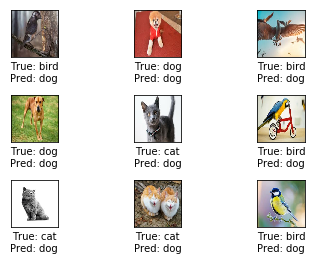

In [14]:
utils.show_images(testDataset, class_names, predict_result)